In [7]:
import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization, MaxPooling2D, Conv2D, Dense, Dropout, Flatten

In [2]:
fashion_class_names = {
    0	: 'T-shirt/top',
    1	: 'Trouser',
    2	: 'Pullover',
    3	: 'Dress',
    4	: 'Coat',
    5	: 'Sandal',
    6	: 'Shirt',
    7	: 'Sneaker',
    8	: 'Bag',
    9	: 'Ankle boot'
}

In [23]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

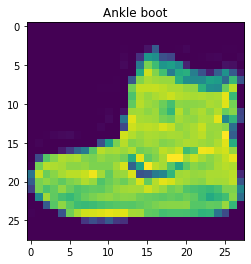

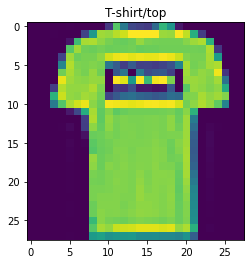

In [24]:
for i in range(2):
    # Grab an image from the data set
    sample_image = x_train[i]
    # Grab the image's expected class id
    image_class_number = y_train[i]
    # Look up the class name from the class id
    image_class_name = fashion_class_names[image_class_number]

    # Draw the image as a plot
    plt.imshow(sample_image)
    # Label the image
    plt.title(image_class_name)
    # Show the plot on the screen
    plt.show()

In [25]:
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
 
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [27]:
model = Sequential()

model.add(Conv2D(64, kernel_size=2, activation='relu', kernel_initializer='he_uniform', input_shape=(28,28,1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size=2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='relu'))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 27, 27, 64)        320       
_________________________________________________________________
batch_normalization_4 (Batch (None, 27, 27, 64)        256       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 12, 12, 64)        16448     
_________________________________________________________________
batch_normalization_5 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

In [28]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer ='adam',
    metrics = ['accuracy']
)

In [29]:
model.fit(
    x_train,
    y_train,
    batch_size=128,
    epochs=25,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 14s 233us/step - loss: 1.3337 - accuracy: 0.6688 - val_loss: 0.9260 - val_accuracy: 0.7154
Epoch 2/25
60000/60000 [==============================] - 13s 221us/step - loss: 0.8050 - accuracy: 0.7596 - val_loss: 0.6594 - val_accuracy: 0.7672
Epoch 3/25
60000/60000 [==============================] - 13s 221us/step - loss: 0.7340 - accuracy: 0.7814 - val_loss: 0.6050 - val_accuracy: 0.8025
Epoch 4/25
60000/60000 [==============================] - 13s 221us/step - loss: 0.7538 - accuracy: 0.7836 - val_loss: 0.6403 - val_accuracy: 0.8044
Epoch 5/25
60000/60000 [==============================] - 13s 221us/step - loss: 0.7135 - accuracy: 0.7893 - val_loss: 0.5951 - val_accuracy: 0.8181
Epoch 6/25
60000/60000 [==============================] - 14s 226us/step - loss: 0.7066 - accuracy: 0.8002 - val_loss: 0.5593 - val_accuracy: 0.8238
Epoch 7/25
60000/60000 [==============================] 

In [30]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=25,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 18s 293us/step - loss: 0.6010 - accuracy: 0.8273 - val_loss: 0.4710 - val_accuracy: 0.8557
Epoch 2/25
60000/60000 [==============================] - 17s 288us/step - loss: 0.5854 - accuracy: 0.8312 - val_loss: 0.4639 - val_accuracy: 0.8579
Epoch 3/25
60000/60000 [==============================] - 18s 294us/step - loss: 0.5959 - accuracy: 0.8307 - val_loss: 0.4497 - val_accuracy: 0.8628
Epoch 4/25
60000/60000 [==============================] - 17s 289us/step - loss: 0.5498 - accuracy: 0.8427 - val_loss: 0.4391 - val_accuracy: 0.8658
Epoch 5/25
60000/60000 [==============================] - 17s 287us/step - loss: 0.5275 - accuracy: 0.8426 - val_loss: 0.4295 - val_accuracy: 0.8665
Epoch 6/25
60000/60000 [==============================] - 17s 289us/step - loss: 0.5332 - accuracy: 0.8480 - val_loss: 0.4286 - val_accuracy: 0.8716
Epoch 7/25
60000/60000 [==============================] 

In [31]:
model.fit(
    x_train,
    y_train,
    batch_size=64,
    epochs=25,
    validation_data=(x_test, y_test)
)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
60000/60000 [==============================] - 17s 290us/step - loss: 0.5101 - accuracy: 0.8575 - val_loss: 0.4462 - val_accuracy: 0.8555
Epoch 2/25
60000/60000 [==============================] - 17s 285us/step - loss: 0.5149 - accuracy: 0.8535 - val_loss: 0.4120 - val_accuracy: 0.8756
Epoch 3/25
60000/60000 [==============================] - 17s 286us/step - loss: 0.5019 - accuracy: 0.8567 - val_loss: 0.4045 - val_accuracy: 0.8757
Epoch 4/25
60000/60000 [==============================] - 17s 286us/step - loss: 0.4983 - accuracy: 0.8591 - val_loss: 0.4063 - val_accuracy: 0.8740
Epoch 5/25
60000/60000 [==============================] - 17s 286us/step - loss: 0.5012 - accuracy: 0.8565 - val_loss: 0.3981 - val_accuracy: 0.8779
Epoch 6/25
60000/60000 [==============================] - 17s 286us/step - loss: 0.5019 - accuracy: 0.8589 - val_loss: 0.3989 - val_accuracy: 0.8765
Epoch 7/25
60000/60000 [==============================] 

In [35]:
score = model.evaluate(x_test, y_test, verbose=0)

print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.8797000050544739
